<a href="https://colab.research.google.com/github/reitezuz/18NES1-2025-/blob/main/week9/pretrained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using a pretrained model without modification

- import the testing data (images):

In [1]:
# --- Download and extract images from GitHub if not already present ---
import requests, zipfile, io, os
image_folder = "conv_images"
if not os.path.exists(image_folder):
    zip_url = "https://github.com/reitezuz/18NES1-2025-/raw/main/week8/conv_images.zip"
    response = requests.get(zip_url)
    z = zipfile.ZipFile(io.BytesIO(response.content))
    z.extractall(image_folder)

## Load and observe a pretrained model, e.g., the VGG 16 model pretraied on ImageNet
- ImageNet is a dataset that includes images from 1,000 categories of common objects (animals, vehicles, instruments, etc.)
- observe that the model works with images of the size 224 x 244 and classifies them into 1000 classes
- observe the architecture and number of parameters of the model

https://keras.io/api/applications/vgg/#vgg16-function

https://keras.io/api/applications/

In [14]:
# import the pretrained model:
import keras
conv_model = keras.applications.vgg16.VGG16(
    weights="imagenet", # weights=None, # for randomly initialized model
    include_top=True)

conv_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

- choose the image to classify and observe the results of classification:
- try various testing images:

In [7]:
# Path to the image (change this to your actual image path)
img_path = "conv_images/conv_images/kitchen.png"
#img_path = "conv_images/conv_images/zebra0.bmp"
#img_path = "conv_images/conv_images/queen.png"
#img_path = "conv_images/conv_images/sun.jpg"
#img_path = "conv_images/conv_images/cat.png"
#img_path = "conv_images/conv_images/house.png"
#img_path = "conv_images/conv_images/turtle.png"


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
Prediction: (1, 1000) Max: 0.43461967 Min: 2.960404e-11
1. cucumber: 43.46%
2. dining_table: 8.07%
3. strawberry: 7.37%
4. plate: 6.01%
5. fig: 5.21%


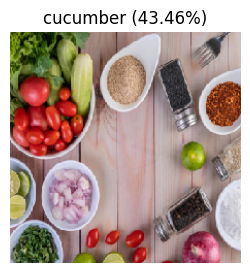

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.utils import load_img, img_to_array

# Load and preprocess the image (voluntary)
img = load_img(img_path, target_size=(224, 224))  # VGG16 expects 224x224 images
x = img_to_array(img)                             # Convert to numpy array
x = np.expand_dims(x, axis=0)                     # Add batch dimension (1, 224, 224, 3)
x = preprocess_input(x)                           # Apply VGG16-specific preprocessing

# Run prediction ... produces vector of class probabilities:
preds = conv_model.predict(x)
print("Prediction:", preds.shape, "Max:", np.max(preds), "Min:", np.min(preds))

# Decode and print top-5 predictions
decoded = decode_predictions(preds, top=5)[0]
for i, (imagenet_id, label, prob) in enumerate(decoded):
    print(f"{i+1}. {label}: {prob*100:.2f}%")

# Plot the image with the top prediction as title
plt.figure(figsize=(3, 3))
plt.imshow(img)
top_label = f"{decoded[0][1]} ({decoded[0][2]*100:.2f}%)"
plt.title(top_label)
plt.axis("off")
plt.show()

## Examine various models and compare the results

https://keras.io/api/applications/

In [14]:
# Uncomment the code to observe the prediction for the particular model:

#from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
#conv_model = ResNet50(weights='imagenet')

#from keras.applications.xception import Xception, preprocess_input, decode_predictions
#conv_model = Xception(weights='imagenet')

from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
conv_model = InceptionV3(weights='imagenet')

conv_model.summary()


Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_482 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_10[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_482[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_470      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_483 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_470[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_483[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_471      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_484 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_471[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_484[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_472      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_20    │ (None, 73, 73,    │          0 │ activation_472[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_485 (Conv2D) │ (None, 73, 73,    │      5,120 │ max_pooling2d_20… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_485[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_473      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_486 (Conv2D) │ (None, 71, 71,    │    138,240 │ activation_473[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_486[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_474      │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 23,851,784 (90.99 MB)

 Trainable params: 23,817,352 (90.86 MB)

 Non-trainable params: 34,432 (134.50 KB)

- observe the results of classification:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
Prediction: (1, 1000) Max: 0.3798256 Min: 6.8531635e-06
1. cucumber: 37.98%
2. corn: 9.10%
3. ear: 5.21%
4. pot: 3.25%
5. Granny_Smith: 2.61%


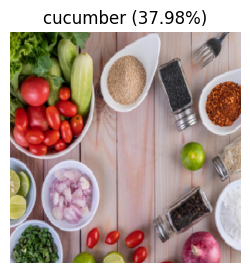

In [16]:

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.utils import load_img, img_to_array

# Load and preprocess the image (voluntary)
input_shape = conv_model.input_shape[1:3]         # Automatically get input size (height, width) from the model config
img = load_img(img_path, target_size=input_shape) # VGG16 expects 224x224 images ... target_size=(224, 224)
x = img_to_array(img)                             # Convert to numpy array
x = np.expand_dims(x, axis=0)                     # Add batch dimension, (1, 224, 224, 3)
x = preprocess_input(x)                           # Apply VGG16-specific preprocessing

# Run prediction ... produces vector of class probabilities:
preds = conv_model.predict(x)
print("Prediction:", preds.shape, "Max:", np.max(preds), "Min:", np.min(preds))

# Decode and print top-5 predictions
decoded = decode_predictions(preds, top=5)[0]
for i, (imagenet_id, label, prob) in enumerate(decoded):
    print(f"{i+1}. {label}: {prob*100:.2f}%")

# Plot the image with the top prediction as title
plt.figure(figsize=(3, 3))
plt.imshow(img)
top_label = f"{decoded[0][1]} ({decoded[0][2]*100:.2f}%)"
plt.title(top_label)
plt.axis("off")
plt.show()

## Observations:

- The models pretrained on ImageNet often produce inaccurate or irrelevant predictions on custom images.
This is especially true when the images contain objects or scenes not present in the original ImageNet dataset.

- To improve performance on your specific images, consider **fine-tuning** or **retraining** the model on a custom dataset that includes the actual categories you're interested in.